### The code below converts the image values in the FER2013 dataset to images and splits them into folders

In [4]:
import pandas as pd
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [5]:
# Maps the emotion label to the name so that it can be saved into the correct directory
emotionsDict = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

datasetFolder = "C:/Users/New User/Desktop/Fourth Year/Usability_Testing_FYP/Datasets/FER2013"
datasetCSV = datasetFolder + "/fer2013.csv"
imageFolder = datasetFolder + "/Images"

dataFrame = pd.read_csv(datasetCSV)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


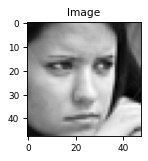

In [6]:
imageFormed = None
for index, row in dataFrame.iterrows():
    emotionNum = row['emotion']
    imagePixels = row['pixels']
    usage = row['Usage']

    width, height = 48, 48
    imageFormed = np.fromstring(imagePixels, dtype=int, sep=" ").reshape((height, width))
    
    outFilePath = imageFolder +"/"+ usage +"/"+ emotionsDict[emotionNum]  +"/"+ str(index)+".jpg"
    cv2.imwrite(outFilePath, imageFormed)
    
#     print(outFilePath)
    
print(dataFrame)

# Dispay an image
fig = plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.rc('font', size=8)

fig.add_subplot(9, 2, 1)
plt.title("Image")
plt.set_cmap('gray')
plt.imshow(imageFormed);